# BEST LOCATION FOR OPENING RESTAURANT IN MUMBAI

## INTRODUCTION 


### Mumbai is known to be the capital of finance and economy of India . It lies on the west coast of India and attracts heavy tourism from all over the globe every year. Personally, I have been brought up in Mumbai and have loved the city from the bottom of my heart. It is one of the major hubs of the world and is extremely diverse with people from various ethnicities residing here. The multi-cultural nature of the city of Mumbai has brought along with it numerous cuisines from all over the world. The people of India generally love food and I personally love to try different cuisines and experience different flavors. Thus, the aim of this project is to study the neighborhoods in Mumbai to determine possible locations for opening a restaurant. This project can be useful for business owners and entrepreneurs who are looking to invest in a restaurant in Mumbai. The main objective of this project is to carefully analyze appropriate data and find recommendations for the stakeholders.


## Data Collection

### The data required for this project has been collected from multiple sources. A summary of the data required for this project is given below.

## Neighborhoods Data
### The data of the neighborhoods in Chennai was scraped from https://en.wikipedia.org/wiki/List_of_neighbourhoods_in_Mumbai. The data is read into a pandas data frame using the read_html() method. The main reason for doing so is that the Wikipedia page provides a comprehensive and detailed table of the data which can easily be scraped using the read_html() method of pandas.

## Geographical Coordinates

### The geographical coordinates for Mumbai data has been obtained from the GeoPy library in python. This data is relevant for plotting the map of Mumbai using the Folium library in python. The geocoder library in python has been used to obtain latitude and longitude data for various neighborhoods in Mumbai. The coordinates of all neighborhoods in Mumbai are used to check the accuracy of coordinates given on Wikipedia and replace them in our data frame if the absolute difference is more than 0.001. These coordinates are then further used for plotting using the Folium library in python.

## Venue Data

### The venue data has been extracted using the Foursquare API. This data contains venue recommendations for all neighborhoods in Mumbai and is used to study the popular venues of different neighborhoods.

### IMPORTING LIBRARIES

In [2]:
!pip install geopy
!pip install geocoder
!pip install folium

import numpy as np
import pandas as pd
import json
from geopy.geocoders import Nominatim
import geocoder
import requests
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
import folium
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.io.json import json_normalize
from sklearn.metrics import silhouette_score

%matplotlib notebook

print('All libraries imported.')


/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
     |████████████████████████████████| 98 kB 7.8 MB/s  eta 0:00:01
/opt/conda/envs/Python-3.7-main/

In [3]:
df = pd.read_html('https://en.wikipedia.org/wiki/List_of_neighbourhoods_in_Mumbai')[-1]
df.rename(columns={'Area': 'Neighborhood'}, inplace=True)
df.head(10)

,Neighborhood,Location,Latitude,Longitude
0,Amboli,"Andheri,Western Suburbs",19.129300,72.843400
1,"Chakala, Andheri",Western Suburbs,19.111388,72.860833
2,D.N. Nagar,"Andheri,Western Suburbs",19.124085,72.831373
3,Four Bungalows,"Andheri,Western Suburbs",19.124714,72.827210
4,Lokhandwala,"Andheri,Western Suburbs",19.130815,72.829270
5,Marol,"Andheri,Western Suburbs",19.119219,72.882743
6,Sahar,"Andheri,Western Suburbs",19.098889,72.867222
7,Seven Bungalows,"Andheri,Western Suburbs",19.129052,72.817018
8,Versova,"Andheri,Western Suburbs",19.120000,72.820000
9,Mira Road,"Mira-Bhayandar,Western Suburbs",19.284167,72.871111


## DATA WRANGLING

In [4]:
df['Location'].value_counts()

South Mumbai                       30
Andheri,Western Suburbs             8
Western Suburbs                     6
Eastern Suburbs                     4
Bandra,Western Suburbs              3
Ghatkopar,Eastern Suburbs           3
Mira-Bhayandar,Western Suburbs      3
Kandivali West,Western Suburbs      3
Powai,Eastern Suburbs               3
Vasai,Western Suburbs               2
Malad,Western Suburbs               2
Harbour Suburbs                     2
Kalbadevi,South Mumbai              2
Mumbai                              2
Borivali (West),Western Suburbs     2
Khar,Western Suburbs                2
Goregaon,Western Suburbs            2
Sanctacruz,Western Suburbs          1
Trombay,Harbour Suburbs             1
Kurla,Eastern Suburbs               1
Fort,South Mumbai                   1
Vile Parle,Western Suburbs          1
Govandi,Harbour Suburbs             1
Tardeo,South Mumbai                 1
Mulund,Eastern Suburbs              1
Colaba,South Mumbai                 1
Antop Hill,S

In [5]:
df['Location'] = df['Location'].apply(lambda x: x.split(',')[-1])
df.head(10)

,Neighborhood,Location,Latitude,Longitude
0,Amboli,Western Suburbs,19.129300,72.843400
1,"Chakala, Andheri",Western Suburbs,19.111388,72.860833
2,D.N. Nagar,Western Suburbs,19.124085,72.831373
3,Four Bungalows,Western Suburbs,19.124714,72.827210
4,Lokhandwala,Western Suburbs,19.130815,72.829270
5,Marol,Western Suburbs,19.119219,72.882743
6,Sahar,Western Suburbs,19.098889,72.867222
7,Seven Bungalows,Western Suburbs,19.129052,72.817018
8,Versova,Western Suburbs,19.120000,72.820000
9,Mira Road,Western Suburbs,19.284167,72.871111


In [6]:
df['Location'].value_counts()

South Mumbai       39
Western Suburbs    36
Eastern Suburbs    12
Harbour Suburbs     4
Mumbai              2
Name: Location, dtype: int64

In [7]:
df

,Neighborhood,Location,Latitude,Longitude
0,Amboli,Western Suburbs,19.129300,72.843400
1,"Chakala, Andheri",Western Suburbs,19.111388,72.860833
2,D.N. Nagar,Western Suburbs,19.124085,72.831373
3,Four Bungalows,Western Suburbs,19.124714,72.827210
4,Lokhandwala,Western Suburbs,19.130815,72.829270
...,...,...,...,...
88,Parel,South Mumbai,18.990000,72.840000
89,Gowalia Tank,South Mumbai,18.962450,72.809703
90,Dava Bazaar,South Mumbai,18.946882,72.831362
91,Dharavi,Mumbai,19.040208,72.850850


In [8]:
neighborhoods_mumbai = df.groupby('Location')['Neighborhood'].nunique()
neighborhoods_mumbai

Location
Eastern Suburbs    12
Harbour Suburbs     4
Mumbai              2
South Mumbai       39
Western Suburbs    36
Name: Neighborhood, dtype: int64

## DATA VISUALIZATION

<IPython.core.display.Javascript object>


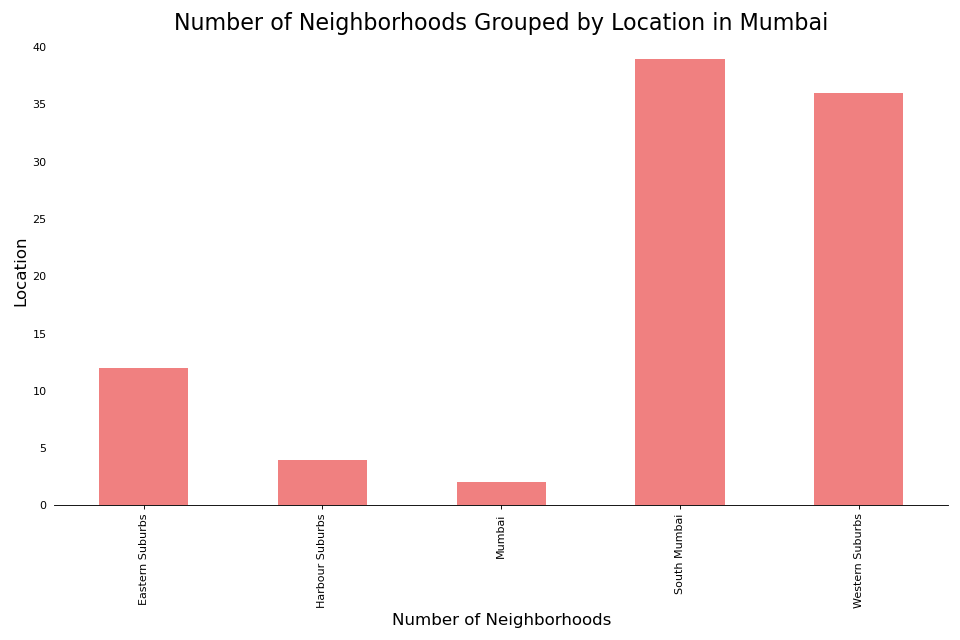

In [9]:
fig = plt.figure(figsize=(12,8))

ax = neighborhoods_mumbai.plot(kind='bar', color='lightcoral')
ax.set_title('Number of Neighborhoods Grouped by Location in Mumbai', fontsize=20)
ax.set_xlabel('Number of Neighborhoods', fontsize=15)
ax.set_ylabel('Location', fontsize=15)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(which='major', left=False)

fig.tight_layout()

In [10]:
!pip install geopy
!pip install geocoder
from geopy.geocoders import Nominatim
import geocoder

latitude = 19.0759899
longitude = 72.8773928

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


In [11]:
places = folium.Map(location = [latitude, longitude], control_scale = True)
places

## USING FOURSQUARE API

In [12]:
CLIENT_ID = 'WQNMYKUDXZ3BYTHPKNJ4YL3IB2PKCUIAM3SQDSHM2PMKQO5V' # your Foursquare ID
CLIENT_SECRET = '5UNOW1GVBX0AFRK4MDUKLXRTRVT1BQRRJW3NA3MLRPODKYFW' # your Foursquare Secret
VERSION = '20200605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value
radius = 500
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: WQNMYKUDXZ3BYTHPKNJ4YL3IB2PKCUIAM3SQDSHM2PMKQO5V
CLIENT_SECRET:5UNOW1GVBX0AFRK4MDUKLXRTRVT1BQRRJW3NA3MLRPODKYFW


In [13]:
neighborhood_name = df.loc[0, 'Neighborhood']
neighborhood_lat = df.loc[0, 'Latitude']
neighborhood_long = df.loc[0, 'Longitude']

print("The neighborhood is {} and it's geographical coordinates are {} latitude and {} longitude".format(neighborhood_name,
                                                                                                        neighborhood_lat, neighborhood_long))

The neighborhood is Amboli and it's geographical coordinates are 19.1293 latitude and 72.8434 longitude


In [14]:
LIMIT = 200
radius = 1000

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_lat, 
    neighborhood_long, 
    radius, 
    LIMIT)

In [15]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '6071417fe649ec7f7c5bcf32'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Jogeshwari West',
  'headerFullLocation': 'Jogeshwari West, Mumbai',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 32,
  'suggestedBounds': {'ne': {'lat': 19.13830000900001,
    'lng': 72.8529082359012},
   'sw': {'lat': 19.120299990999992, 'lng': 72.83389176409881}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '5174e2be498e39cf0d1c20cb',
       'name': 'Shawarma Factory',
       'location': {'address': 'Dadabhai Road',
        'crossStreet': 'Off JP Road, Near Navrang Cinema',
        'lat': 19.124590572173467,
        'lng': 72.8403981304492,
    

In [16]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [17]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues)

filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues = nearby_venues.loc[:, filtered_columns]

nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  app.launch_new_instance()


,name,categories,lat,lng
0,Shawarma Factory,Falafel Restaurant,19.124591,72.840398
1,Cafe Arfa,Indian Restaurant,19.128930,72.847140
2,Jaffer Bhai's Delhi Darbar,Mughlai Restaurant,19.137714,72.845909
3,"5 Spice , Bandra",Chinese Restaurant,19.130421,72.847206
4,Pizza Express,Pizza Place,19.131893,72.834668


In [18]:
print("{} venues were returned for {} by Foursquare".format(len(nearby_venues), neighborhood_name))

32 venues were returned for Amboli by Foursquare


In [19]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [20]:
mum_venues = getNearbyVenues(names=df['Neighborhood'], latitudes=df['Latitude'], longitudes=df['Longitude'], radius=radius)

Amboli
Chakala, Andheri
D.N. Nagar
Four Bungalows
Lokhandwala
Marol
Sahar
Seven Bungalows
Versova
Mira Road
Bhayandar
Uttan
Bandstand Promenade
Kherwadi
Pali Hill
I.C. Colony
Gorai
Dahisar
Aarey Milk Colony
Bangur Nagar
Jogeshwari West
Juhu
Charkop
Poisar
Mahavir Nagar
Thakur village
Pali Naka
Khar Danda
Dindoshi
Sunder Nagar
Kalina
Naigaon
Nalasopara
Virar
Irla
Vile Parle
Bhandup
Amrut Nagar
Asalfa
Pant Nagar
Kanjurmarg
Nehru Nagar
Nahur
Chandivali
Hiranandani Gardens
Indian Institute of Technology Bombay campus
Vidyavihar
Vikhroli
Chembur
Deonar
Mankhurd
Mahul
Agripada
Altamount Road
Bhuleshwar
Breach Candy
Carmichael Road
Cavel
Churchgate
Cotton Green
Cuffe Parade
Cumbala Hill
Currey Road
Dhobitalao
Dongri
Kala Ghoda
Kemps Corner
Lower Parel
Mahalaxmi
Mahim
Malabar Hill
Marine Drive
Marine Lines
Mumbai Central
Nariman Point
Prabhadevi
Sion
Walkeshwar
Worli
C.G.S. colony
Dagdi Chawl
Navy Nagar
Hindu colony
Ballard Estate
Chira Bazaar
Fanas Wadi
Chor Bazaar
Matunga
Parel
Gowalia Tank


In [21]:
print("There are {} unique categories".format(mum_venues['Venue Category'].nunique()))

There are 230 unique categories


## ONE-HOT ENCODING

In [22]:
mum_onehot = pd.get_dummies(mum_venues[['Venue Category']], prefix="", prefix_sep="")
mum_onehot.head()


,ATM,Accessories Store,Afghan Restaurant,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Amphitheater,Antique Shop,...,Trail,Train,Train Station,Vegetarian / Vegan Restaurant,Video Store,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Zoo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
mum_onehot['Neighborhood'] = mum_venues['Neighborhood']
mum_onehot.head()

,ATM,Accessories Store,Afghan Restaurant,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Amphitheater,Antique Shop,...,Trail,Train,Train Station,Vegetarian / Vegan Restaurant,Video Store,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Zoo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
temp = list(mum_onehot.columns)

if 'Neighborhood' in temp:
    temp.remove('Neighborhood')
    
fixed_columns = ['Neighborhood'] + temp
mum_onehot = mum_onehot[fixed_columns]

mum_onehot.head()

,Neighborhood,ATM,Accessories Store,Afghan Restaurant,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Amphitheater,...,Trail,Train,Train Station,Vegetarian / Vegan Restaurant,Video Store,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Zoo
0,Amboli,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Amboli,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Amboli,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Amboli,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Amboli,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
mum_grouped = mum_onehot.groupby('Neighborhood', sort=False).mean().reset_index()
print(mum_grouped.shape)
mum_grouped.head(10)

(90, 230)


,Neighborhood,ATM,Accessories Store,Afghan Restaurant,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Amphitheater,...,Trail,Train,Train Station,Vegetarian / Vegan Restaurant,Video Store,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Zoo
0,Amboli,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.031250,0.031250,0.0,0.0,0.0,0.000000,0.0,0.0
1,"Chakala, Andheri",0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.050000,0.0,0.0,0.0,0.000000,0.0,0.0
2,D.N. Nagar,0.0,0.018868,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.056604,0.0,0.0,0.0,0.037736,0.0,0.0
3,Four Bungalows,0.0,0.019608,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.019608,0.058824,0.0,0.0,0.0,0.019608,0.0,0.0
4,Lokhandwala,0.0,0.010204,0.0,0.000000,0.000000,0.000000,0.000000,0.010204,0.0,...,0.0,0.0,0.000000,0.020408,0.0,0.0,0.0,0.010204,0.0,0.0
5,Marol,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
6,Sahar,0.0,0.000000,0.0,0.029851,0.074627,0.059701,0.044776,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
7,Seven Bungalows,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.035714,0.0,0.0,0.0,0.000000,0.0,0.0
8,Versova,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.030303,0.0,0.0,0.0,0.000000,0.0,0.0
9,Mira Road,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.040000,0.0,0.0,0.0,0.000000,0.0,0.0


In [26]:
num_top_venues = 5

for hood in mum_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = mum_grouped[mum_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Amboli----
                venue  freq
0   Indian Restaurant  0.16
1                 Bar  0.12
2         Pizza Place  0.09
3                 Pub  0.06
4  Chinese Restaurant  0.06


----Chakala, Andheri----
                  venue  freq
0                 Hotel  0.15
1     Indian Restaurant  0.10
2    Seafood Restaurant  0.08
3                  Café  0.08
4  Fast Food Restaurant  0.05


----D.N. Nagar----
                           venue  freq
0                            Bar  0.13
1                    Pizza Place  0.08
2              Indian Restaurant  0.06
3  Vegetarian / Vegan Restaurant  0.06
4                            Pub  0.06


----Four Bungalows----
                           venue  freq
0                            Pub  0.08
1              Indian Restaurant  0.08
2                           Café  0.06
3  Vegetarian / Vegan Restaurant  0.06
4                            Bar  0.06


----Lokhandwala----
               venue  freq
0                Bar  0.09
1  Indian Restaurant

           venue  freq
0  Train Station  0.17
1            Gym  0.17
2    Bus Station  0.17
3     Sports Bar  0.17
4          Diner  0.17


----Agripada----
                  venue  freq
0     Indian Restaurant  0.18
1           Coffee Shop  0.09
2  Fast Food Restaurant  0.09
3                Bakery  0.09
4                   Zoo  0.05


----Altamount Road----
                  venue  freq
0                  Café  0.06
1     Indian Restaurant  0.06
2                Bakery  0.06
3    Chinese Restaurant  0.05
4  Fast Food Restaurant  0.04


----Bhuleshwar----
                  venue  freq
0     Indian Restaurant  0.27
1                  Café  0.06
2                Bakery  0.04
3    Chinese Restaurant  0.04
4  Fast Food Restaurant  0.04


----Breach Candy----
               venue  freq
0               Café  0.09
1             Bakery  0.07
2  Indian Restaurant  0.05
3        Coffee Shop  0.05
4     Sandwich Place  0.05


----Carmichael Road----
                  venue  freq
0    Chinese Res

In [27]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]



indicators = ['st', 'nd', 'rd']

columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = mum_grouped['Neighborhood']

for ind in np.arange(mum_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(mum_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Amboli,Indian Restaurant,Bar,Pizza Place,Chinese Restaurant,Pub
1,"Chakala, Andheri",Hotel,Indian Restaurant,Seafood Restaurant,Café,Fast Food Restaurant
2,D.N. Nagar,Bar,Pizza Place,Vegetarian / Vegan Restaurant,Indian Restaurant,Pub
3,Four Bungalows,Indian Restaurant,Pub,Bar,Coffee Shop,Vegetarian / Vegan Restaurant
4,Lokhandwala,Bar,Indian Restaurant,Pub,Pizza Place,Coffee Shop
...,...,...,...,...,...,...
85,Parel,Train Station,Plaza,Indian Restaurant,Hotel,Roof Deck
86,Gowalia Tank,Indian Restaurant,Café,Bakery,Coffee Shop,Snack Place
87,Dava Bazaar,Indian Restaurant,Café,Chinese Restaurant,Fast Food Restaurant,Train Station
88,Dharavi,Indian Restaurant,Fast Food Restaurant,Bakery,Hotel,Coffee Shop


## K-MEANS CLUSTERING

In [28]:
def plot(x, y):
    fig = plt.figure(figsize=(12,6))
    plt.plot(x, y, 'o-')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Scores')
    plt.title('Checking Optimum Number of Clusters')
    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

In [29]:
maxk = 15
scores = []
kval = []

for k in range(2, maxk+1):
    cl_df = mum_grouped.drop('Neighborhood', axis=1)
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=40).fit_predict(cl_df) #Choose any random_state
    
    score = silhouette_score(cl_df, kmeans, metric='euclidean', random_state=0)
    kval.append(k)
    scores.append(score)

<IPython.core.display.Javascript object>


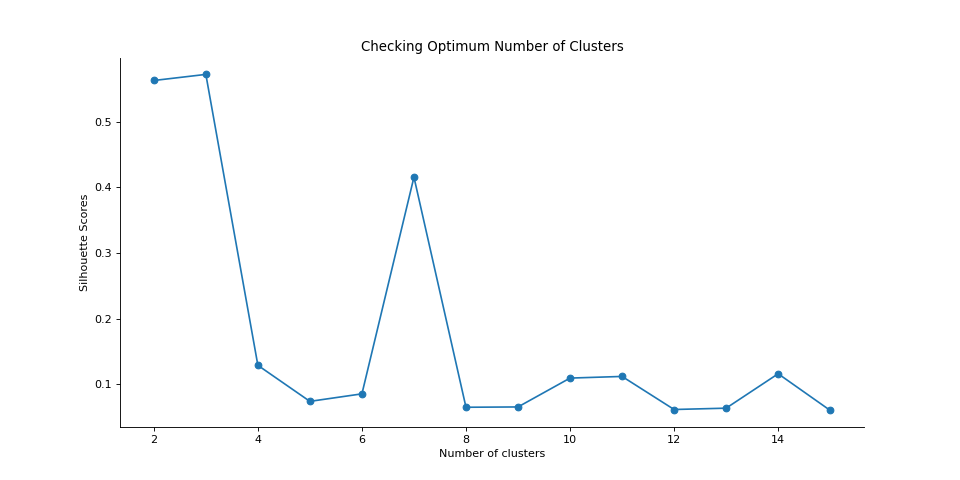

In [30]:
plot(kval, scores)

In [31]:
k = 5

mum_clustering = mum_grouped.drop('Neighborhood', axis=1)
kmeans = KMeans(n_clusters=k, init="k-means++", random_state=40).fit(mum_clustering) #Can choose any random_state

kmeans.labels_

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 4, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 4, 1, 1, 1,
       2, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1], dtype=int32)

In [32]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
mum_merged = df
mum_merged = mum_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

In [33]:
print(mum_merged.shape)
mum_merged

(93, 10)


,Neighborhood,Location,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Amboli,Western Suburbs,19.129300,72.843400,1.0,Indian Restaurant,Bar,Pizza Place,Chinese Restaurant,Pub
1,"Chakala, Andheri",Western Suburbs,19.111388,72.860833,1.0,Hotel,Indian Restaurant,Seafood Restaurant,Café,Fast Food Restaurant
2,D.N. Nagar,Western Suburbs,19.124085,72.831373,1.0,Bar,Pizza Place,Vegetarian / Vegan Restaurant,Indian Restaurant,Pub
3,Four Bungalows,Western Suburbs,19.124714,72.827210,1.0,Indian Restaurant,Pub,Bar,Coffee Shop,Vegetarian / Vegan Restaurant
4,Lokhandwala,Western Suburbs,19.130815,72.829270,1.0,Bar,Indian Restaurant,Pub,Pizza Place,Coffee Shop
...,...,...,...,...,...,...,...,...,...,...
88,Parel,South Mumbai,18.990000,72.840000,1.0,Train Station,Plaza,Indian Restaurant,Hotel,Roof Deck
89,Gowalia Tank,South Mumbai,18.962450,72.809703,1.0,Indian Restaurant,Café,Bakery,Coffee Shop,Snack Place
90,Dava Bazaar,South Mumbai,18.946882,72.831362,0.0,Indian Restaurant,Café,Chinese Restaurant,Fast Food Restaurant,Train Station
91,Dharavi,Mumbai,19.040208,72.850850,0.0,Indian Restaurant,Fast Food Restaurant,Bakery,Hotel,Coffee Shop


## CLUSTER 1

In [34]:
mum_merged.loc[mum_merged['Cluster Labels'] == 0, mum_merged.columns[[0] + [1] + list(range(5, mum_merged.shape[1]))]]

,Neighborhood,Location,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
5,Marol,Western Suburbs,Indian Restaurant,Hotel,Fast Food Restaurant,Snack Place,Diner
20,Jogeshwari West,Western Suburbs,Indian Restaurant,Fast Food Restaurant,Camera Store,Department Store,Bookstore
38,Asalfa,Eastern Suburbs,Indian Restaurant,Coffee Shop,Bakery,Men's Store,Factory
39,Pant Nagar,Eastern Suburbs,Indian Restaurant,Gym / Fitness Center,Fast Food Restaurant,Pizza Place,Coffee Shop
42,Nahur,Eastern Suburbs,Indian Restaurant,Restaurant,Department Store,Café,Coffee Shop
45,Indian Institute of Technology Bombay campus,Eastern Suburbs,Indian Restaurant,Coffee Shop,Event Space,Lake,Food Court
49,Deonar,Harbour Suburbs,Indian Restaurant,Fast Food Restaurant,Garden,Pool,Snack Place
52,Agripada,South Mumbai,Indian Restaurant,Coffee Shop,Fast Food Restaurant,Bakery,Asian Restaurant
54,Bhuleshwar,South Mumbai,Indian Restaurant,Café,Bakery,Chinese Restaurant,Fast Food Restaurant
57,Cavel,South Mumbai,Indian Restaurant,Restaurant,Fast Food Restaurant,Cricket Ground,Bar


## CLUSTER 2

In [35]:
mum_merged.loc[mum_merged['Cluster Labels'] == 1, mum_merged.columns[[0] + [1] + list(range(5, mum_merged.shape[1]))]]

,Neighborhood,Location,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Amboli,Western Suburbs,Indian Restaurant,Bar,Pizza Place,Chinese Restaurant,Pub
1,"Chakala, Andheri",Western Suburbs,Hotel,Indian Restaurant,Seafood Restaurant,Café,Fast Food Restaurant
2,D.N. Nagar,Western Suburbs,Bar,Pizza Place,Vegetarian / Vegan Restaurant,Indian Restaurant,Pub
3,Four Bungalows,Western Suburbs,Indian Restaurant,Pub,Bar,Coffee Shop,Vegetarian / Vegan Restaurant
4,Lokhandwala,Western Suburbs,Bar,Indian Restaurant,Pub,Pizza Place,Coffee Shop
...,...,...,...,...,...,...,...
80,Dagdi Chawl,South Mumbai,Indian Restaurant,Coffee Shop,Fast Food Restaurant,Bakery,Zoo
81,Navy Nagar,South Mumbai,Golf Course,Asian Restaurant,Beach,General Entertainment,Department Store
88,Parel,South Mumbai,Train Station,Plaza,Indian Restaurant,Hotel,Roof Deck
89,Gowalia Tank,South Mumbai,Indian Restaurant,Café,Bakery,Coffee Shop,Snack Place


## CLUSTER 3

In [36]:
mum_merged.loc[mum_merged['Cluster Labels'] == 2, mum_merged.columns[[0] + [1] + list(range(5, mum_merged.shape[1]))]]

,Neighborhood,Location,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
68,Mahalaxmi,South Mumbai,Arcade,Zoo,Department Store,Farm,Falafel Restaurant


## CLUSTER 4

In [37]:
mum_merged.loc[mum_merged['Cluster Labels'] == 3, mum_merged.columns[[0] + [1] + list(range(5, mum_merged.shape[1]))]]

,Neighborhood,Location,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
32,Nalasopara,Western Suburbs,Bus Station,Bar,Department Store,Falafel Restaurant,Factory


## Results and Discussion

### By analyzing the five clusters obtained we can see that some of the clusters are more suited for restaurants and hotels, whereas, other clusters are less suited. Neighborhoods in clusters 3, 4 contain a small percentage of restaurants, hotels, cafe and pubs in their top 10 common venues. These clusters contain a higher degree of other venues like train station, bus station, fish market, gym, performing arts venue and smoke shop, to name a few. Thus, they are not well suited for opening a new restaurant. On the other hand, neighborhoods in clusters 1 and 2 contain a much higher degree of restaurants, hotels, multiplex, cafes, bars and other food joints. Thus, the neighborhoods in these clusters would be well suited for opening a new restaurant.

### Comparing clusters 1 and 2, neighborhoods in cluster 1 seem to be more suited for starting a restaurant since they contains a larger percentage of food joints in the top 10 most common venues than cluster 1. The neighborhoods in cluster 1 contain a variety of food joints like restaurants, tea rooms, bakery, cafe, steakhouse and pubs and also contain very diverse cuisines like Japanese, Indian, Chinese, Italian and seafood restaurants. Most neighborhoods in cluster 2 seem to have Indian Restaurant as their top most common venue; however, on careful analysis we can see that neighborhoods in cluster 2 also contain other venues like soccer field, flea market, smoke shop, gym, train station, dance studio, music store, cosmetics shop and so on. Thus, it is recommended that the new restaurant can be opened in the neighborhoods belonging to cluster 1.

## Conclusion

### We have successfully analyzed the neighborhoods in Mumbai, India for determining which would be the best neighborhoods for opening a new restaurant. Based on our analysis, neighborhoods in cluster 1 are recommended as locations for the new restaurant. This has also been plotted in the map above. The stakeholders and investors can further tune this by considering various other factors like transport, legal requirements, and costs associated. These were out of the scope for this project and thus were not considered.